In [25]:
import pandas as pd
from util import eda_augment_dataset, get_dataframe_from_json
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading and data preprocessing

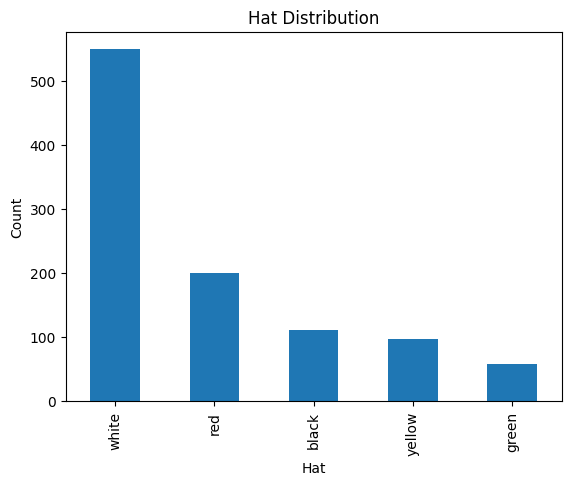

In [26]:
hld = get_dataframe_from_json('../dailydialog/hand_labeled/hand_labelled_dataset.json')

# Convert labels to integer
hat_map = {
    0: "red",
    1: "white",
    2: "black",
    3: "yellow",
    4: "green",
}
reverse_hat_map = {v: k for k, v in hat_map.items()}
hld['hat'] = hld['hat'].apply(lambda x: reverse_hat_map[x])

# Removing __eou__ delimiter
hld['utterance'] = hld['utterance'].str.replace('__eou__', '', regex=False)

# Remove useless white spaces
hld['utterance'] = hld['utterance'].str.replace(r'\s+([,.!?;:])', r'\1', regex=True)

hld['hat'].map(hat_map).value_counts().plot(kind='bar')
plt.title("Hat Distribution")
plt.xlabel("Hat")
plt.ylabel("Count")
plt.show()

In [31]:
hld['hat'].map(hat_map).value_counts()

hat
white     550
red       200
black     112
yellow     97
green      58
Name: count, dtype: int64

In [27]:
train_df, test_df = train_test_split(hld, test_size=0.2, random_state=42, stratify=hld['hat'])

train_df.to_json('train_dataset.json', orient='records', lines=False)
test_df.to_json('test_dataset.json', orient='records', lines=False)

# Data Augmentation using EDA

In [28]:

green_augmented = eda_augment_dataset(train_df[train_df['hat'] == 4], num_aug=10, alpha_sr=0.05, alpha_ri=0.05, alpha_rs=0.05, p_rd=0.1)
yellow_augmented = eda_augment_dataset(train_df[train_df['hat'] == 3], num_aug=10, alpha_sr=0.05, alpha_ri=0.05, alpha_rs=0.05, p_rd=0.1)
black_augmented = eda_augment_dataset(train_df[train_df['hat'] == 2], num_aug=10, alpha_sr=0.05, alpha_ri=0.05, alpha_rs=0.05, p_rd=0.1)
red_augmented = eda_augment_dataset(train_df[train_df['hat'] == 0], num_aug=5, alpha_sr=0.05, alpha_ri=0.05, alpha_rs=0.05, p_rd=0.1)

augmented_train_df = pd.concat([train_df, green_augmented, yellow_augmented, black_augmented, red_augmented], ignore_index=True)
augmented_train_df

,turn,utterance,emotion,act,hat
0,3,"I'll take one, too.",happiness,inform,0
1,8,"You know, we are superior to other clothes com...",no_emotion,inform,3
2,5,"Her new boyfriend, right?",no_emotion,commissive,1
3,9,How about recommending him to use the storage ...,no_emotion,directive,4
4,1,"Oh, a bouquet of flowers. It's very kind of you.",surprise,commissive,1
...,...,...,...,...,...
3738,0,i am wholly so bored all day,no_emotion,inform,0
3739,0,i am so bored all daylight,no_emotion,inform,0
3740,0,i am so bored all day,no_emotion,inform,0
3741,0,i am so bored all daytime,no_emotion,inform,0


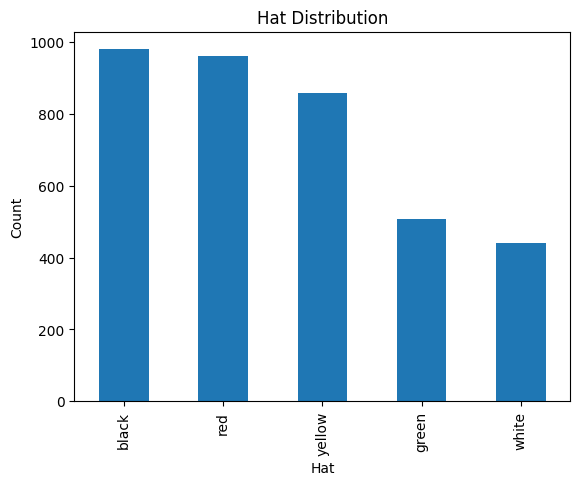

In [29]:
augmented_train_df['hat'].map(hat_map).value_counts().plot(kind='bar')
plt.title("Hat Distribution")
plt.xlabel("Hat")
plt.ylabel("Count")
plt.show()

In [30]:
augmented_train_df.to_json('eda_train_dataset.json', orient='records', lines=False)

In [33]:
augmented_train_df['hat'].map(hat_map).value_counts()

hat
black     979
red       960
yellow    858
green     506
white     440
Name: count, dtype: int64